<a href="https://colab.research.google.com/github/MatthewC00273575/Data-Science/blob/master/Bayesian_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Defined column names based on UCI documentation
columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

data = pd.read_csv('agaricus-lepiota.data', header=None, names=columns)

# Quick check
print(data.head())
print(data.shape)  # Should be (8124, 23)
print(data['class'].value_counts())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [ ]:
# Check for missing values ('?' in the data)
print(data.isin(['?']).sum())

# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)
print(data.isnull().sum())  # Confirm NaN counts

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64
class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment               

In [ ]:
# Drop rows with missing values
data_clean = data.dropna()
print(data_clean.shape)

# Separate features and target
X = data_clean.drop('class', axis=1)  # 22 categorical features
y = data_clean['class'].map({'e': 0, 'p': 1})  # 0 = edible, 1 = poisonous

# One-hot encode features
X_encoded = pd.get_dummies(X)
print(X_encoded.shape)

# Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

(5644, 23)
(5644, 98)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Fit baseline model
model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print(f"Baseline Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Baseline Accuracy: 0.966


In [ ]:
from sklearn.feature_selection import VarianceThreshold
# Drops features where the variance is ≤ 0.01
selector = VarianceThreshold(threshold=0.01)
X_train_selected = selector.fit_transform(X_train) # keep only the ones above the threshold.
X_test_selected = selector.transform(X_test) # test with the selected features

model_selected = MultinomialNB(alpha=1.0)
model_selected.fit(X_train_selected, y_train)
print(f"Selected Features Accuracy: {accuracy_score(y_test, model_selected.predict(X_test_selected)):.3f}")

Selected Features Accuracy: 0.965


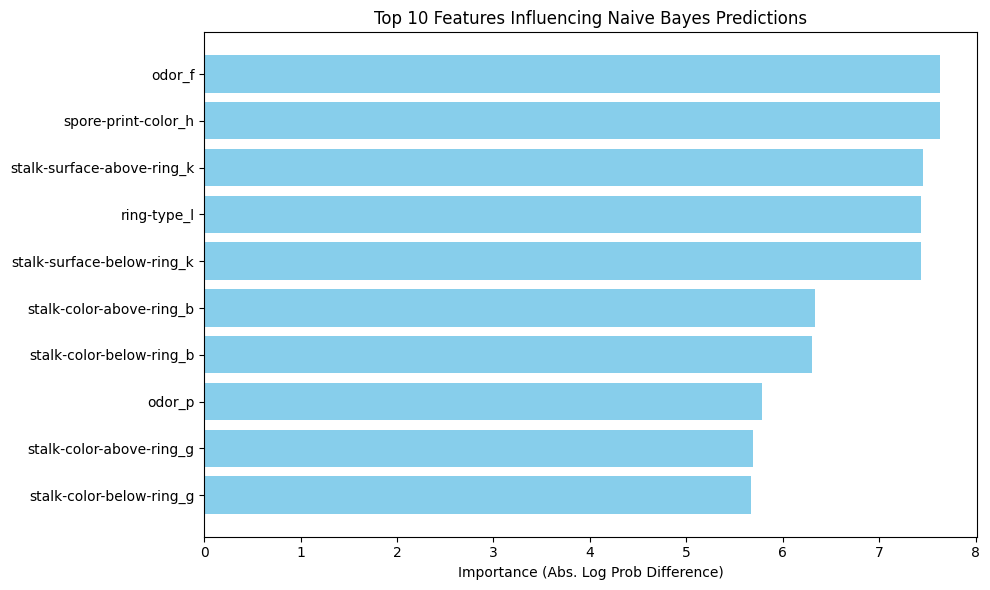

In [ ]:
import matplotlib.pyplot as plt
# Get feature log probabilities for class 1 (poisonous)
log_probs = model.feature_log_prob_[1]  # Shape: (n_features,)
feature_names = X_train.columns

# Calculate importance as absolute difference between log probs for each class
importance = np.abs(model.feature_log_prob_[1] - model.feature_log_prob_[0])

# Sort and pick top 10
top_idx = np.argsort(importance)[-10:]  # Top 10 features
top_features = feature_names[top_idx]
top_importance = importance[top_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importance, color='skyblue')
plt.xlabel('Importance (Abs. Log Prob Difference)')
plt.title('Top 10 Features Influencing Naive Bayes Predictions')
plt.tight_layout()
plt.show()

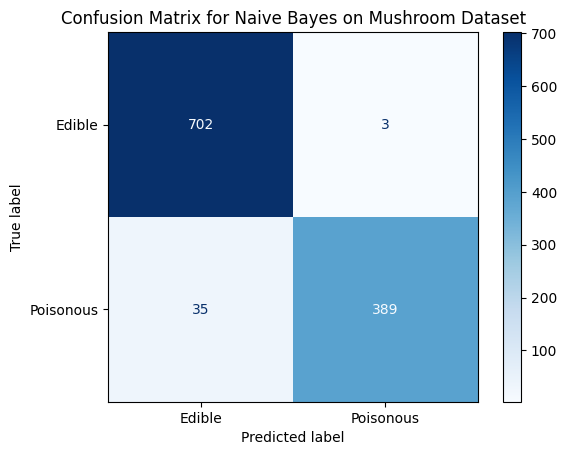

Accuracy: 0.966


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Edible', 'Poisonous'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Naive Bayes on Mushroom Dataset')
plt.show()

# Print accuracy for reference
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")